In [1]:
from HSC3D import HSC3D

Provide the path to the targeting point cloud file. It is recommended to use .ply file as given in example.


In [2]:
point_path = "ttq2af.ply"

# Example 1: Using the HSC3D Function directly

This package provides an integrated implementation of algorithms and visual functions shown in the paper. We provided the optimized parameters (see paper section 2) by default to run the analysis. All generated figures will be saved in your working directory and key statistics will be print out when calling `HSC3D()` function.


Loadded the point cloud from: ttq2af.ply . Shape of the point cloud is: (86406, 3)
Computing Shannon entropy ...
Entropy computed as: 16.353096669547135
Computing structural roughness ...
Structural roughness computed as: 1.336651769968916
Computing curvature ...
Curvature computed as: 35.52538893218646
Computing convex hull ...
Convex hull volume computed as: 1567.361927697685
Computing alpha shape...
Alpha shape volume computed as: 189.58047798245335
Plotting volume ...
Computing Gaussian mixture model...
Gaussian mixture model dispersion computed as: 247.81669819500206


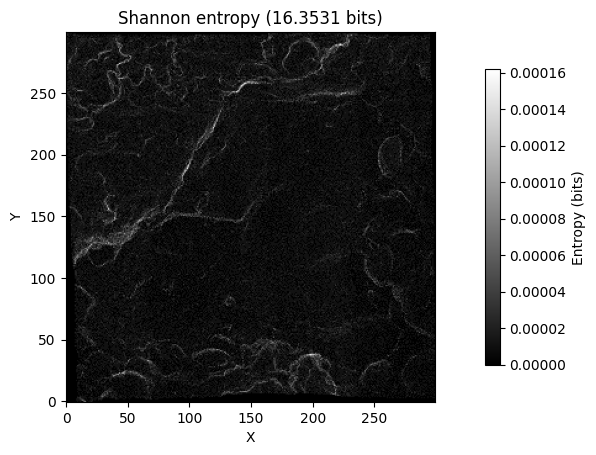

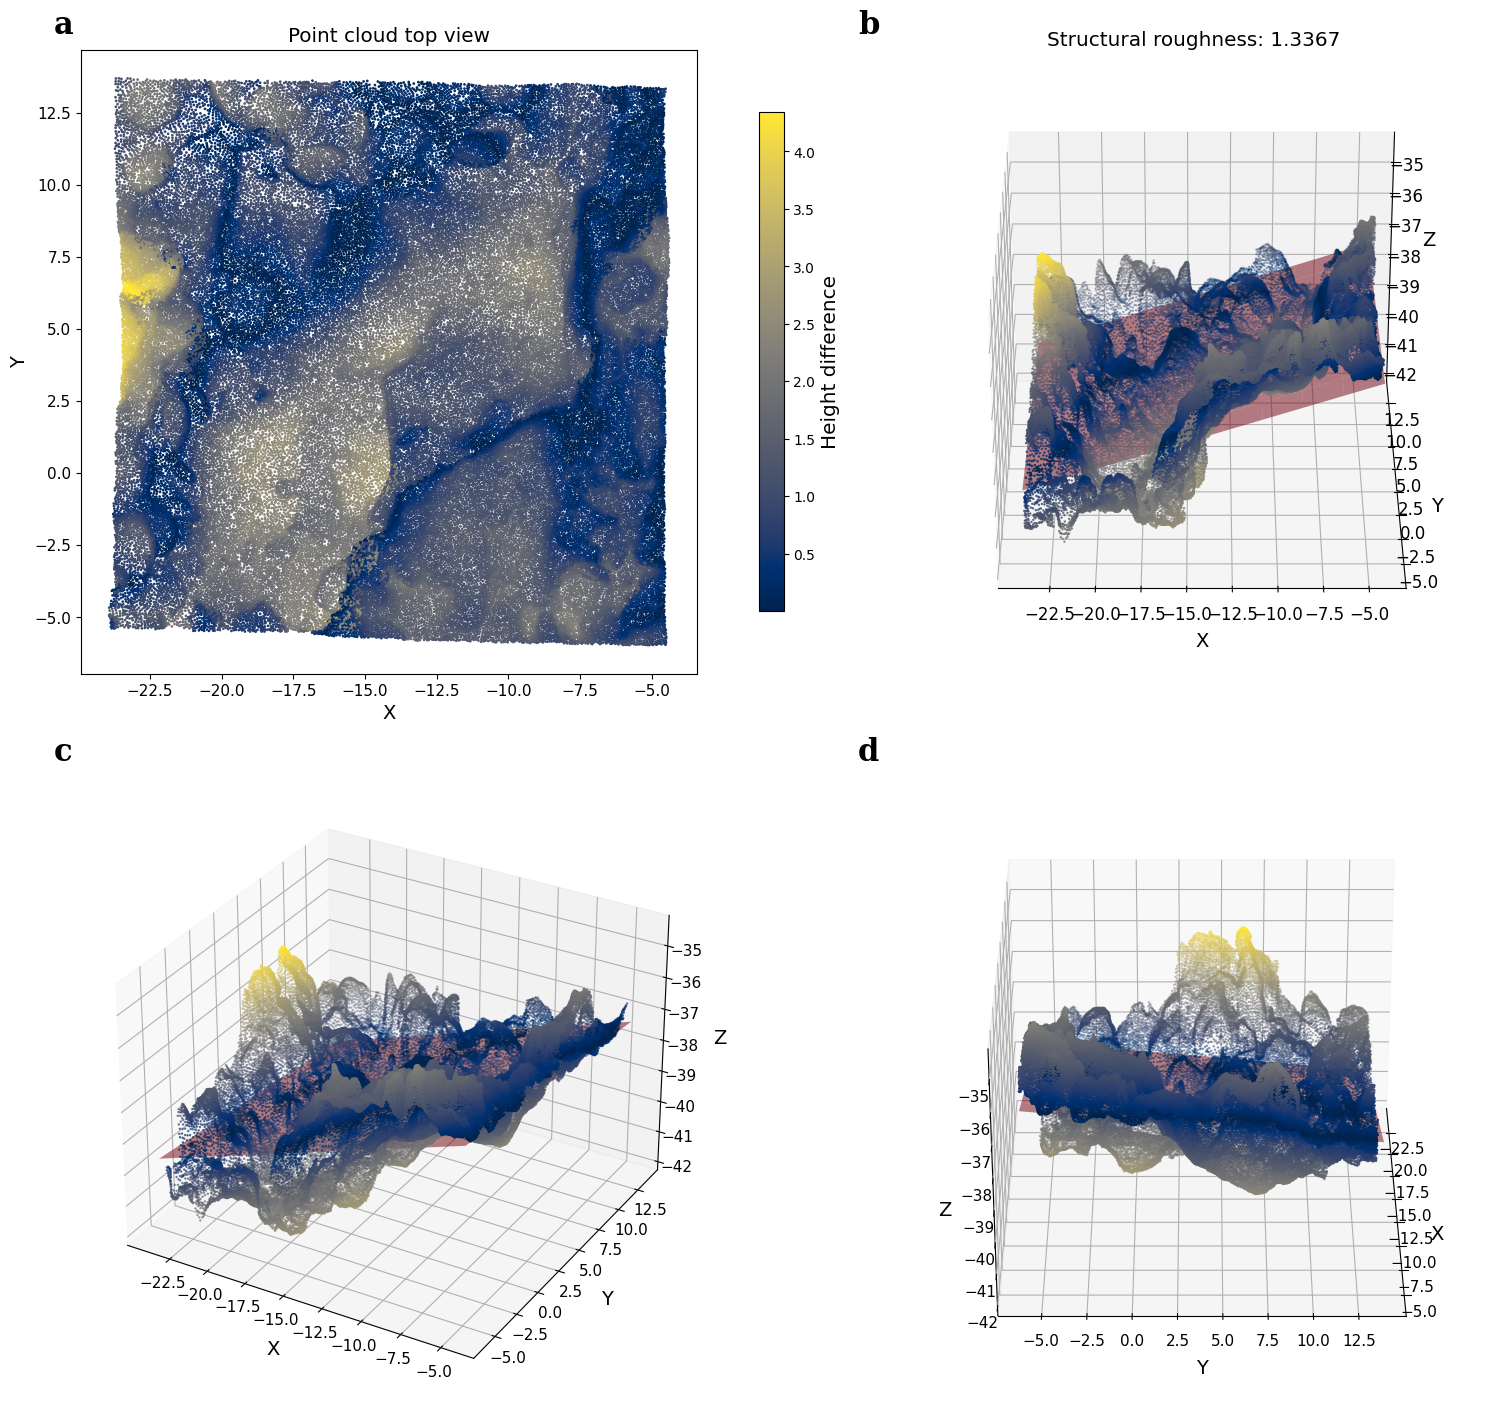

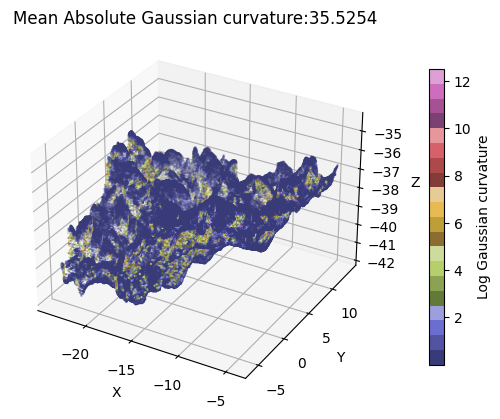

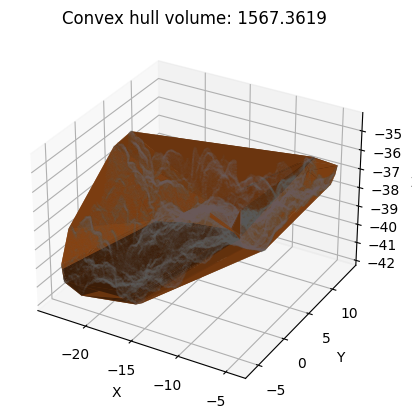

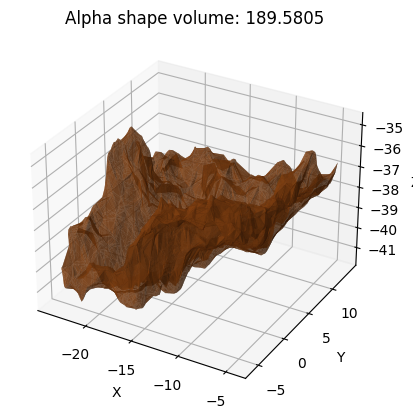

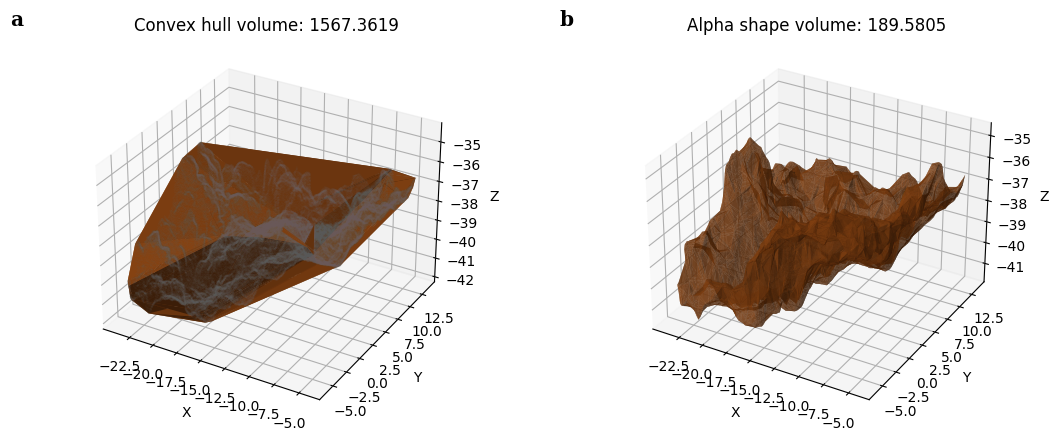

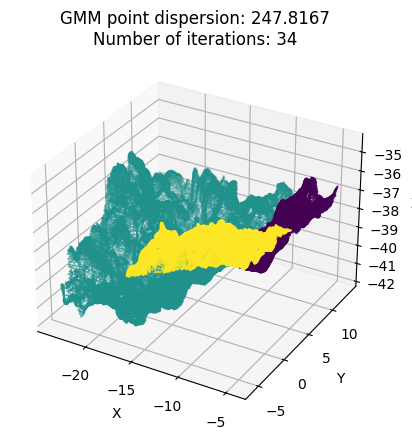

In [3]:
description = HSC3D(point_path)

# Example 2: Access variables

The structural roughness, Gaussian curvature, Shannon entropy, Convex hull volume and alpha shape volume can be accessed inside the HSC3D object. There are callable objects constructed for each variable respectively.


1. Roughness: The root mean square (RMS) structural roughness of the target shape. Roughness is acceessed though the `roughness` value of the `roughness` inside the `HSC3D` object. A demostraction is as below:


In [4]:
roughness_value = description.roughness.roughness
print("RMS structural roughness of the object is", roughness_value)

RMS structural roughness of the object is 1.336651769968916


We can also get the roughness value of each point, represented by its distance to the fitted plane, in the point cloud through the `height_differences` variable of the `roughness` object from the `HSC3D` object. See the demostraction below:


In [5]:
point_roughness_value = description.roughness.height_differences
print(len(point_roughness_value))
print(
    "The roughness of the 101st point of the point cloud is: {:6f}".format(
        point_roughness_value[100]
    )
)

86406
The roughness of the 101st point of the point cloud is: 0.284237


2. Curvature: the Mean Absolute Gaussian curvature is reported in the HSC3D output. The value can be accessed by getting the `mean_curvature` variable from `curvature` object inside `HSC3D` object.


In [6]:
mean_curvature = description.curvature.mean_curvature
print("The mean curvature is:", mean_curvature)

The mean curvature is: 35.52538893218646


3. Entropy: the entropy of the point cloud can be accessed by `entropy_val` of `entropy` object inside `HSC3D`.


In [7]:
entropy_value = description.entropy.entropy_val
print("The entropy is:", entropy_value)

The entropy is: 16.353096669547135


4. Convex Hull volume: The volume of convex hull is stored in `volume` variable in `convex_hull` object of `HSC3D`.


In [8]:
convex_hull_volume = description.convex_hull.volume
print("The convex hull volume of the graph is:", convex_hull_volume)

The convex hull volume of the graph is: 1567.361927697685


5. Alpha Shape Volume: volume estimation by alpha shape method is stored in `volume` object of the `alpha_shape` object inside `HSC3D`


In [9]:
alpha_shape_volume = description.alpha_shape.volume
print("The alpha shape volume of the graph is:", alpha_shape_volume)

The alpha shape volume of the graph is: 189.58047798245335


6. Gaussian mixture model descriptor: the dispersion of point cloud is stored in `dispersion` variable of `gmm` object of `HSC3D`


In [10]:
gmm_dispersion = description.gmm.dispersion
print("Point cloud dispersion is:", gmm_dispersion)

Point cloud dispersion is: 247.81669819500206


# Example 3: Using each method individually

Each metric can be calculated directly when an array-like format of the point cloud data is provided. If the provided point cloud is `.ply` format, the package provides method for reading the points directly. Otherwise, it is recommended to use the `open3d` package to convert data format first. Following are examples:


In [11]:
from HSC3D import read_pts

# Read the points to array-like formula
point_data = read_pts(point_path)

1. Structural roughness, the method will directly provide the plots:


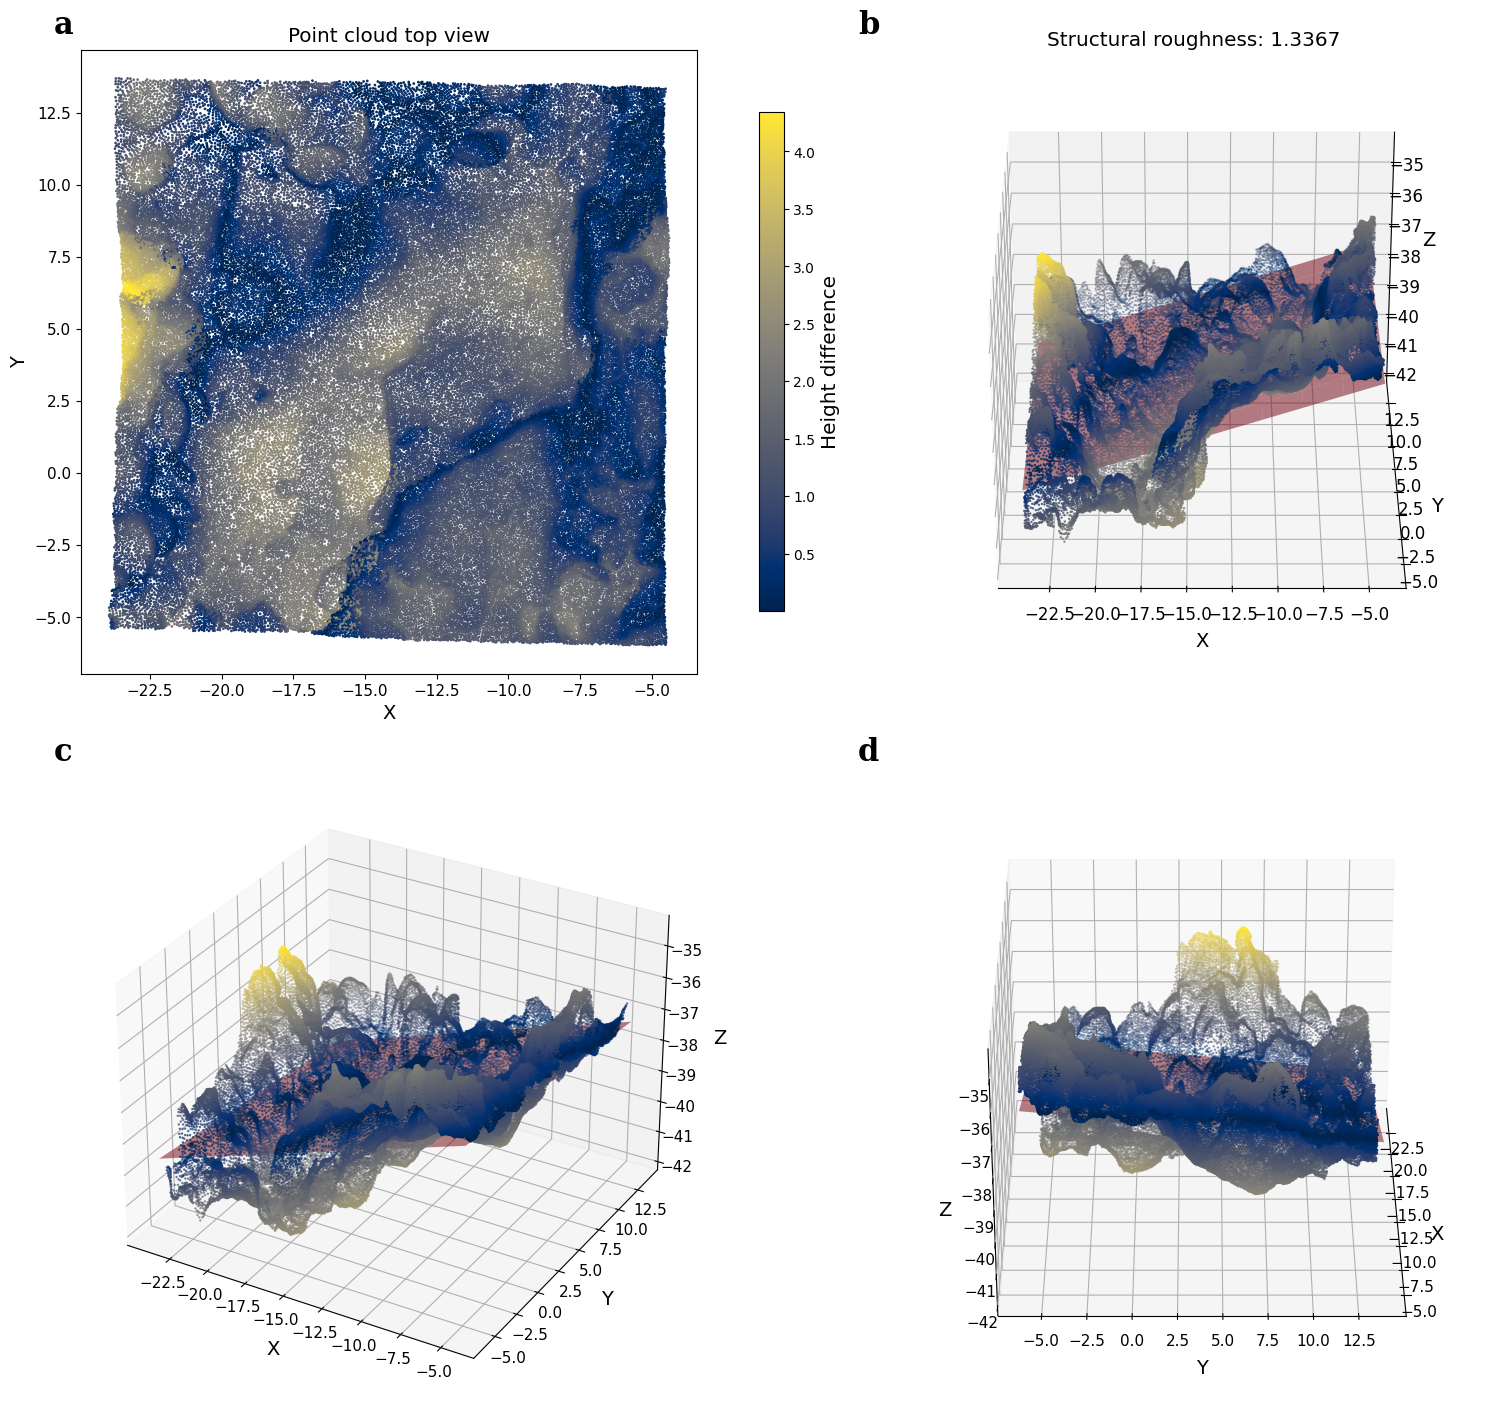

In [12]:
from HSC3D import roughness

cloud_roughness = roughness(point_data)

2. Curvatures. We provided the parameters to get more customized output from this function. For example, we can alter number of k for nearest point selection, the analytical formula of the surface and whether to expand the surface equation using the estimated normal vectors from SVD.

- Variables:
- `query_k`: the number of the points to construct local surface.
- `method`: selection of analytical formula for the local surface fitting. The default fromula is `third`(Goldfeather & Interrante, 2004): $$ ax^2+bxy+cy^2+dx^3+ex+fy+gy^3 $$ By selecting `second` (He et al., 2013) the local surface formula will be: $$ ax^2+bxy+cy^2+dx+ey $$
- `expand_variable`: whether using estimated normal vector for solving the surface equation. Disabling is recommended for simple surface that can be fitted with second or third order polynomial. In addition, when disabled, the `query_k` is recommended to be tripled.


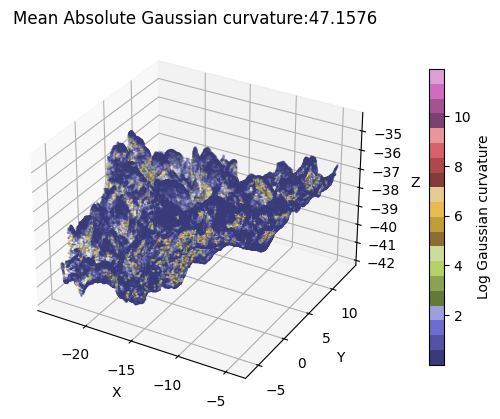

In [13]:
from HSC3D import curvature

# Example: Reducing the k to 8, and using the second order curvature formula
# Note that the default k is 14, and the default method is "third"
second_order_curvature = curvature(point_data, query_k=8, method="second")

3. Entropy estimation: Shannon entropy can be estimated directly using the array-like point data.


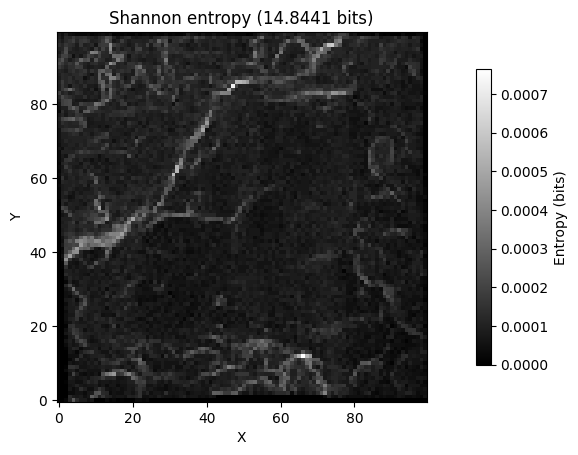

In [14]:
from HSC3D import entropy

# Example: Reducing the dimensionality of a point cloud using entropy with bins=100
# Note that the default bins number is 300
cloud_entropy = entropy(point_data, bins=100)
# Notice that by reducing bins number the entropy value can be unrepresentative! 
# Adjust the bins number to your data.

4. Convex hull volume: Convex hull volume can be estimated directly using the array-like point data.


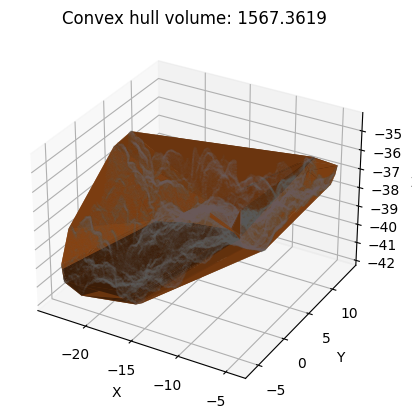

In [15]:
from HSC3D import convex_hull

cloud_convex_hull = convex_hull(point_data)

5. Alpha shape volume: alpha shape volume can be estimated directly using the array-like point data.


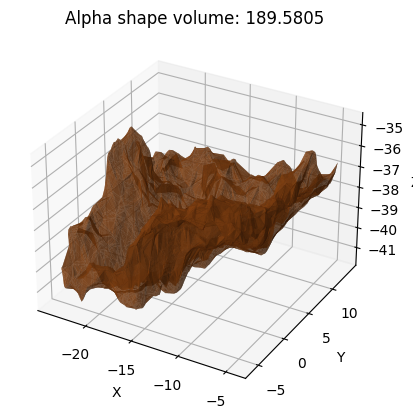

In [16]:
from HSC3D import alpha_shape

cloud_alpha_shape = alpha_shape(point_data)

6. Gaussian mixture model analyses of the point cloud: dispersion rate can be accessed by the Gaussian mixture model.

- `n_components`: number of components of the Gaussian mixture model.


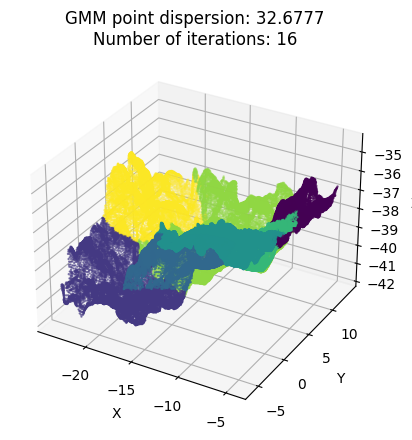

In [17]:
from HSC3D import gmm

# Example: estimating 7 components Gaussian mixture model for the point cloud.
# Note that the default number of components is 3.
cloud_gmm = gmm(point_data, n_components=7)

### References:

```
@article{goldfeather2004novel,
  title={A novel cubic-order algorithm for approximating principal direction vectors},
  author={Goldfeather, Jack and Interrante, Victoria},
  journal={ACM Transactions on Graphics (TOG)},
  volume={23},
  number={1},
  pages={45--63},
  year={2004},
  publisher={ACM New York, NY, USA}
}

@article{he2013automatic,
  title={An automatic registration algorithm for the scattered point clouds based on the curvature feature},
  author={He, Bingwei and Lin, Zeming and Li, You Fu},
  journal={Optics \& Laser Technology},
  volume={46},
  pages={53--60},
  year={2013},
  publisher={Elsevier}
}
```
